<a href="https://colab.research.google.com/github/zyraf13/KomparasiKNN_dan_NaiveBayes/blob/main/Penelitian_Data_MIning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

In [167]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [168]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.shopee.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=2000,
    filter_score_with=None
)

In [169]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,11ecf6f5-4b2c-4d6a-a4c4-065da547380a,Ini H,https://play-lh.googleusercontent.com/a-/AD_cM...,"Aplikasi semakin lelet & lemot, terlalu berat ...",1,7972,3.03.10,2023-06-14 05:41:39,"hi ka, mkasi feedbacknya, maaf buat ga nyaman....",2023-06-14 06:23:25,3.03.10
1,501ff873-b55c-44e7-b25e-b31a471e68eb,Lola Pertiwi Mulyadi,https://play-lh.googleusercontent.com/a-/AD_cM...,"Lambat, lemot, mau chat ke penjual sering gaga...",1,1799,3.03.10,2023-06-15 01:08:53,"Hi kak, maaf ya atas kendala aplikasi lemot. M...",2023-06-15 02:16:11,3.03.10
2,aa5c099b-8b2d-4cc3-8c85-1c345cdb3bdf,Epri Yadi,https://play-lh.googleusercontent.com/a-/AD_cM...,"Tolong untuk pihak Shopee,Tolong untuk di eval...",1,1359,3.04.20,2023-06-29 06:39:11,"Hai kak, maaf ya. Terkait kendala, mimin saran...",2023-06-29 07:18:27,3.04.20
3,2280f36f-d568-4d65-bed7-7ea993ea172b,RA Widyaningsih,https://play-lh.googleusercontent.com/a-/AD_cM...,"Shopee sering lemot itu sudah biasa, tapi mala...",3,16,3.04.20,2023-07-02 16:27:00,None,NaT,3.04.20
4,757cfb68-41ee-447a-8d4b-69869fc49212,emd,https://play-lh.googleusercontent.com/a-/AD_cM...,"Aplikasi shopee itu bermasalah banget, mau pro...",1,740,3.03.10,2023-06-14 12:16:59,"Hi kak, maaf atas kendalanya. Terkait kendala ...",2023-06-14 13:35:47,3.03.10


In [170]:
len(df_busu.index) #count the number of data we got

2000

In [171]:
def convert_sentiment(score):
    if score <= 2:
        return 'Negatif'
    else:
        return 'Positif'

In [172]:
df_busu['sentiment'] = df_busu['score'].apply(convert_sentiment)

In [173]:
print(df_busu[['userName', 'score', 'sentiment', 'content']].head())

               userName  score sentiment  \
0                 Ini H      1   Negatif   
1  Lola Pertiwi Mulyadi      1   Negatif   
2             Epri Yadi      1   Negatif   
3       RA Widyaningsih      3   Positif   
4                   emd      1   Negatif   

                                             content  
0  Aplikasi semakin lelet & lemot, terlalu berat ...  
1  Lambat, lemot, mau chat ke penjual sering gaga...  
2  Tolong untuk pihak Shopee,Tolong untuk di eval...  
3  Shopee sering lemot itu sudah biasa, tapi mala...  
4  Aplikasi shopee itu bermasalah banget, mau pro...  


In [174]:
# Menentukan jumlah ulasan positif dan negatif
positive_count = df_busu[df_busu['sentiment'] == 'Positif'].shape[0]
negative_count = df_busu[df_busu['sentiment'] == 'Negatif'].shape[0]

# Menampilkan hasil
print("Jumlah ulasan positif:", positive_count)
print("Jumlah ulasan negatif:", negative_count)

Jumlah ulasan positif: 706
Jumlah ulasan negatif: 1294


In [175]:
df_busu[['userName', 'score', 'sentiment', 'at', 'content']].head()  #preview userName, rating, date-time, and reviews only

,userName,score,sentiment,at,content
0,Ini H,1,Negatif,2023-06-14 05:41:39,"Aplikasi semakin lelet & lemot, terlalu berat ..."
1,Lola Pertiwi Mulyadi,1,Negatif,2023-06-15 01:08:53,"Lambat, lemot, mau chat ke penjual sering gaga..."
2,Epri Yadi,1,Negatif,2023-06-29 06:39:11,"Tolong untuk pihak Shopee,Tolong untuk di eval..."
3,RA Widyaningsih,3,Positif,2023-07-02 16:27:00,"Shopee sering lemot itu sudah biasa, tapi mala..."
4,emd,1,Negatif,2023-06-14 12:16:59,"Aplikasi shopee itu bermasalah banget, mau pro..."


In [176]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score', 'sentiment', 'at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,sentiment,at,content
1251,Lisna Ananda,2,Negatif,2023-07-03 13:29:10,"Kok apk ny jdi kyk ginii, mau bayar Spinjam tp..."
80,kim kim,1,Negatif,2023-07-03 12:56:57,Pembelian paket data sama sekali gak dapat. Pa...
6,Gede,1,Negatif,2023-07-03 12:38:55,"Aplikasi lemot berat boros ram,mau cek out jd ..."
770,Lirien Devica,1,Negatif,2023-07-03 11:58:39,Shopee knp ya udh seminggu ini gak bisa ambil ...
79,Dyan Nurhayati,5,Positif,2023-07-03 11:51:16,"Lumayan membantu belanja online, tapi sayang b..."


In [177]:
my_df = sorted_df[['userName', 'score','sentiment', 'at', 'content']] #get userName, rating, date-time, and reviews only

In [178]:
my_df.head()

,userName,score,sentiment,at,content
1251,Lisna Ananda,2,Negatif,2023-07-03 13:29:10,"Kok apk ny jdi kyk ginii, mau bayar Spinjam tp..."
80,kim kim,1,Negatif,2023-07-03 12:56:57,Pembelian paket data sama sekali gak dapat. Pa...
6,Gede,1,Negatif,2023-07-03 12:38:55,"Aplikasi lemot berat boros ram,mau cek out jd ..."
770,Lirien Devica,1,Negatif,2023-07-03 11:58:39,Shopee knp ya udh seminggu ini gak bisa ambil ...
79,Dyan Nurhayati,5,Positif,2023-07-03 11:51:16,"Lumayan membantu belanja online, tapi sayang b..."


In [179]:
filtered_df = sorted_df.loc[sorted_df['sentiment'] == 'Positif']
print(filtered_df.head())

            userName  score sentiment                  at  \
79    Dyan Nurhayati      5   Positif 2023-07-03 11:51:16   
371       Mustari KM      5   Positif 2023-07-03 11:47:06   
692  sarbeni ariston      5   Positif 2023-07-03 11:43:15   
12     Eman Suherman      3   Positif 2023-07-03 11:11:10   
91       Topo Susilo      3   Positif 2023-07-03 11:05:50   

                                               content  
79   Lumayan membantu belanja online, tapi sayang b...  
371  Pertama kali beli langsung dapat barang palsu....  
692  Sejauh ini lancar lancar saja. Saya tidak pern...  
12   Makin Bersahabat dari sebelumnya. Cukup nyaman...  
91   Berbelanja di shopee lebih baik dibayar setela...  


In [180]:
!pip install Sastrawi

In [181]:
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Menginisialisasi tokenisasi menggunakan word_tokenize dari nltk
nltk.download('punkt')  # Mengunduh data yang diperlukan untuk word_tokenize

# Tokenisasi teks dalam kolom 'content'
df_busu['tokens'] = df_busu['content'].apply(lambda x: word_tokenize(x))

# Menampilkan hasil tokenisasi
print(df_busu[['content', 'tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Lambat, lemot, mau chat ke penjual sering gaga...   
2  Tolong untuk pihak Shopee,Tolong untuk di eval...   
3  Shopee sering lemot itu sudah biasa, tapi mala...   
4  Aplikasi shopee itu bermasalah banget, mau pro...   

                                              tokens  
0  [Aplikasi, semakin, lelet, &, lemot, ,, terlal...  
1  [Lambat, ,, lemot, ,, mau, chat, ke, penjual, ...  
2  [Tolong, untuk, pihak, Shopee, ,, Tolong, untu...  
3  [Shopee, sering, lemot, itu, sudah, biasa, ,, ...  
4  [Aplikasi, shopee, itu, bermasalah, banget, ,,...  


In [183]:
import string

In [184]:
# Fungsi untuk memfilter kata
def filter_words(text):
    # Menghapus tanda baca dan simbol
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Mengubah huruf menjadi huruf kecil
    text = text.lower()
    return text

In [185]:
# Memfilter kata pada kolom 'content'
df_busu['filtered_content'] = df_busu['content'].apply(filter_words)

In [186]:
# Menampilkan hasil
print(df_busu[['content', 'filtered_content']].head())

                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Lambat, lemot, mau chat ke penjual sering gaga...   
2  Tolong untuk pihak Shopee,Tolong untuk di eval...   
3  Shopee sering lemot itu sudah biasa, tapi mala...   
4  Aplikasi shopee itu bermasalah banget, mau pro...   

                                    filtered_content  
0  aplikasi semakin lelet  lemot terlalu berat  s...  
1  lambat lemot mau chat ke penjual sering gagal ...  
2  tolong untuk pihak shopeetolong untuk di evalu...  
3  shopee sering lemot itu sudah biasa tapi malam...  
4  aplikasi shopee itu bermasalah banget mau pros...  


In [187]:
keyword = 'lemot'
filtered_df = df_busu[df_busu['tokens'].apply(lambda x: keyword in x)]
print(filtered_df[['content', 'tokens']].head())

                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Lambat, lemot, mau chat ke penjual sering gaga...   
2  Tolong untuk pihak Shopee,Tolong untuk di eval...   
3  Shopee sering lemot itu sudah biasa, tapi mala...   
6  Aplikasi lemot berat boros ram,mau cek out jd ...   

                                              tokens  
0  [Aplikasi, semakin, lelet, &, lemot, ,, terlal...  
1  [Lambat, ,, lemot, ,, mau, chat, ke, penjual, ...  
2  [Tolong, untuk, pihak, Shopee, ,, Tolong, untu...  
3  [Shopee, sering, lemot, itu, sudah, biasa, ,, ...  
6  [Aplikasi, lemot, berat, boros, ram, ,, mau, c...  


In [188]:
stemmer = StemmerFactory().create_stemmer()

In [189]:
df_busu['stemmed_tokens'] = df_busu['tokens'].apply(lambda x: [stemmer.stem(token) for token in x])

In [190]:
print(df_busu[['content', 'stemmed_tokens']].head())

                                             content  \
0  Aplikasi semakin lelet & lemot, terlalu berat ...   
1  Lambat, lemot, mau chat ke penjual sering gaga...   
2  Tolong untuk pihak Shopee,Tolong untuk di eval...   
3  Shopee sering lemot itu sudah biasa, tapi mala...   
4  Aplikasi shopee itu bermasalah banget, mau pro...   

                                      stemmed_tokens  
0  [aplikasi, makin, lelet, , lot, , terlalu, ber...  
1  [lambat, , lot, , mau, chat, ke, jual, sering,...  
2  [tolong, untuk, pihak, shopee, , tolong, untuk...  
3  [shopee, sering, lot, itu, sudah, biasa, , tap...  
4  [aplikasi, shopee, itu, masalah, banget, , mau...  


**Algoritma KNN**

In [360]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [361]:
# Mengambil 1000 dataset pertama
df_subset = df_busu.head(1000)

In [362]:
# Mengambil kolom yang dibutuhkan (misalnya, 'stemmed_tokens' dan 'sentiment')
data = df_busu[['stemmed_tokens', 'sentiment']]

In [363]:
# Menggabungkan token-token dalam list menjadi satu string
data['text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))

<ipython-input-363-6329eef40417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['stemmed_tokens'].apply(lambda x: ' '.join(x))


In [364]:
# Memisahkan fitur (X) dan label (y)
X = df_subset['stemmed_tokens']
y = df_subset['sentiment']

In [365]:
# Membagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [366]:
# Membangun vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.astype('U'))  # Ubah X_train menjadi format string
X_test_vectorized = vectorizer.transform(X_test.astype('U'))  # Ubah X_test menjadi format string

In [367]:
# Melatih model KNN
k = 5  # Jumlah tetangga terdekat yang digunakan
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [368]:
# Memprediksi label menggunakan data pengujian
y_pred_knn = knn.predict(X_test_vectorized)

In [369]:
# Menampilkan laporan klasifikasi secara keseluruhan
report_overall = classification_report(y_test, y_pred_knn, target_names=['Negatif', 'Positif'])
print("Laporan Klasifikasi Keseluruhan:")
print(report_overall)

Laporan Klasifikasi Keseluruhan:
              precision    recall  f1-score   support

     Negatif       0.77      0.91      0.84       140
     Positif       0.65      0.37      0.47        60

    accuracy                           0.75       200
   macro avg       0.71      0.64      0.65       200
weighted avg       0.73      0.75      0.73       200



In [370]:
# Menghitung akurasi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 71.50%


**Metode Naive Bayes**

In [371]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [372]:
# Mengambil 1000 dataset pertama
df_subset = df_busu.head(1000)

In [373]:
# Memisahkan fitur (X) dan label (y)
X = df_subset['stemmed_tokens']
y = df_subset['sentiment']

In [374]:
# Bagi data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(df_busu['content'], df_busu['sentiment'], test_size=0.2, random_state=42)


In [375]:
# Bangun vektor fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [376]:
# Latih model Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)

MultinomialNB()

In [377]:
# Lakukan prediksi pada data pengujian
y_pred_nb = naive_bayes.predict(X_test_vectorized)

In [378]:
#Menampilkan laporan klasifikasi keseluruhan
report_overall = classification_report(y_test, y_pred_nb, target_names=['Negatif', 'Positif'])
print("Laporan Klasifikasi Keseluruhan:")
print(report_overall)

Laporan Klasifikasi Keseluruhan:
              precision    recall  f1-score   support

     Negatif       0.70      1.00      0.82       260
     Positif       1.00      0.19      0.31       140

    accuracy                           0.71       400
   macro avg       0.85      0.59      0.57       400
weighted avg       0.80      0.71      0.64       400



In [379]:
# Hitung akurasi
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 71.50%


**Komparasi pada model KNN dan Naive Bayes**

In [380]:
import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
positive_count = df_subset[df_subset['sentiment'] == 'Positif'].shape[0]
negative_count = df_subset[df_subset['sentiment'] == 'Negatif'].shape[0]

print("Jumlah Ulasan Positif:", positive_count)
print("Jumlah Ulasan Negatif:", negative_count)

Jumlah Ulasan Positif: 319
Jumlah Ulasan Negatif: 681


In [382]:
# Menyiapkan data untuk grafik
models = ['KNN', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_nb]

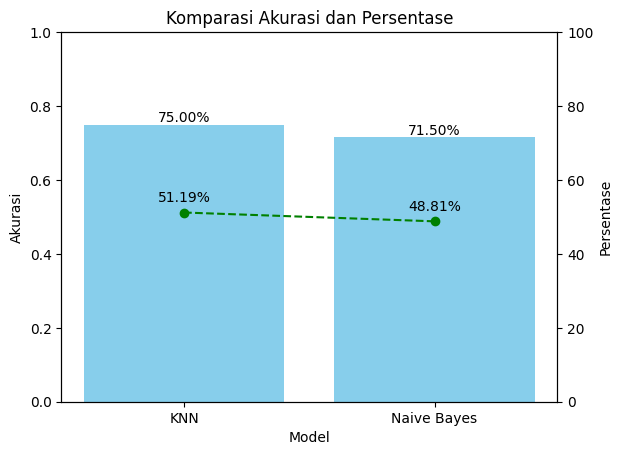

In [388]:
# Membuat grafik
fig, ax1 = plt.subplots()

# Menggambar bar grafik akurasi
bar1 = ax1.bar(models, accuracies, color='skyblue')
ax1.set_xlabel('Model')
ax1.set_ylabel('Akurasi')
ax1.set_ylim(0, 1)

# Menambahkan label persentase pada batang grafik akurasi
for bar in bar1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{height*100:.2f}%', ha='center', va='bottom')

# Menghitung presentase akurasi
total = sum(accuracies)
percentages = [(acc / total) * 100 for acc in accuracies]

# Menyiapkan data untuk grafik persentase
ax2 = ax1.twinx()
ax2.plot(models, percentages, marker='o', color='green', linestyle='--')
ax2.set_ylabel('Persentase')
ax2.set_ylim(0, 100)

# Menambahkan label persentase pada garis grafik persentase
for i, percentage in enumerate(percentages):
    ax2.text(models[i], percentage + 2, f'{percentage:.2f}%', ha='center', va='bottom')

# Menampilkan grafik
plt.title('Komparasi Akurasi dan Persentase')
plt.show()